In [1]:
import pandas as pd

nodes = pd.read_csv("sweethome3d-comm_louvain1-nodes.csv")
# edges = pd.read_csv("sweethome3d-comm_louvain-edges.csv")

nodes.shape

(16, 14)

note: communities [hidef] are from cytoscape's community detection with default parameters:

- algorithm = HiDeF
- weight column = none
- parameters:
  - max resolution = 50
  - consensus threshold = 75
  - persistent threshold = 5
  - algorithm = louvain
  - target community number = (blank)

communities [louvain] uses the parameters:

- algorithm = Louvain
- weight column = none
- parameters:
  - directed = True
  - overlapping = False
  - random gen seed = 42
  - resolution = 5
  - deep hierarchy = False

In [2]:
nodes['level'] = [l if l==0 else 1 for l in nodes['level']]

note: level is currently manually edited in cytoscape. should be automated:

- visited nodes <- []
- remaining nodes <- all nodes
- find sink (node with no outgoing edges)
- assign level 0 to sink
- add sink to visited nodes
- remove sink from remaining nodes
- while there are remaining nodes:
  - find nodes in remaining nodes that has edge to visited nodes
  - assign level +1 to those nodes
  - add those nodes to visited nodes
  - remove those nodes from remaining nodes

problem: cytoscape community detection export does not show edges' source and target???

In [3]:
nodes['members'] = [set(l.split(" ")) for l in nodes['CD_MemberList']]

nodes.sort_values(by=['level'], ascending=False, inplace=True)
indices = list(nodes.index)

df = nodes[['name', 'CD_MemberList_Size', 'members', 'level']]
pd.concat([df.head(5), df.tail(5)])

,name,CD_MemberList_Size,members,level
1,C38751,102,"{PlanController.DragAndDropState, PlanControll...",1.0
2,C38752,72,"{LengthUnit, WallPanel, SweetHome3D.Standalone...",1.0
3,C38753,70,{PhotosController.HomeStoredCamerasChangeListe...,1.0
4,C38754,60,"{HomeFrameController, HomePDFPrinter, HomePane...",1.0
5,C38755,59,"{Sash, TextureManager.ComparableTexture, Compo...",1.0
12,C38762,8,"{Max3DSLoader.Material3DS, Max3DSLoader.Mesh3D...",1.0
13,C38763,4,"{SweetHome3DViewer, SweetHome3DApplet, SweetHo...",1.0
14,C38764,3,"{VisualTransferHandler, VisualTransferHandler....",1.0
15,C38765,2,"{AppletApplication.AppletBasicService, AppletA...",1.0
0,C38766,578,{HomePieceOfFurniture3D.DefaultMaterialAndText...,0.0


In [4]:
nodes['my_members_str'] = ["" for i in indices]
df = nodes[['name', 'CD_MemberList_Size', 'members', 'my_members_str']]
pd.concat([df.head(5), df.tail(5)])

,name,CD_MemberList_Size,members,my_members_str
1,C38751,102,"{PlanController.DragAndDropState, PlanControll...",
2,C38752,72,"{LengthUnit, WallPanel, SweetHome3D.Standalone...",
3,C38753,70,{PhotosController.HomeStoredCamerasChangeListe...,
4,C38754,60,"{HomeFrameController, HomePDFPrinter, HomePane...",
5,C38755,59,"{Sash, TextureManager.ComparableTexture, Compo...",
12,C38762,8,"{Max3DSLoader.Material3DS, Max3DSLoader.Mesh3D...",
13,C38763,4,"{SweetHome3DViewer, SweetHome3DApplet, SweetHo...",
14,C38764,3,"{VisualTransferHandler, VisualTransferHandler....",
15,C38765,2,"{AppletApplication.AppletBasicService, AppletA...",
0,C38766,578,{HomePieceOfFurniture3D.DefaultMaterialAndText...,


In [5]:
visited = { n for n in nodes.loc[indices[0],'members'] }
nodes.loc[indices[0],'my_members_str'] = ' '.join(visited)


In [6]:
for idx in range(1,len(indices)):
  i = indices[idx-1]
  j = indices[idx]
  my_nodes = nodes.loc[j,'members'] - visited
  visited |= my_nodes
  # print(nodes.loc[j,'name'])
  # print("then",nodes.loc[j,'members'])
  # print(" now",my_nodes)
  nodes.loc[j,'my_members_str'] = ' '.join(my_nodes)

nodes['my_members'] = [set(l.split(" ")) if l else set() for l in nodes['my_members_str']]
nodes['my_members_size'] = [len(l) for l in nodes['my_members']]


In [7]:
df = nodes[['name', 'CD_MemberList_Size', 'members', 'my_members_size', 'my_members', 'level']]

pd.concat([df.head(5), df.tail(5)])

,name,CD_MemberList_Size,members,my_members_size,my_members,level
1,C38751,102,"{PlanController.DragAndDropState, PlanControll...",102,"{PlanController.DragAndDropState, PlanControll...",1.0
2,C38752,72,"{LengthUnit, WallPanel, SweetHome3D.Standalone...",72,"{LengthUnit, WallPanel, SweetHome3D.Standalone...",1.0
3,C38753,70,{PhotosController.HomeStoredCamerasChangeListe...,70,{PhotosController.HomeStoredCamerasChangeListe...,1.0
4,C38754,60,"{HomeFrameController, HomePDFPrinter, HomePane...",60,"{HomeFrameController, HomePDFPrinter, HomePane...",1.0
5,C38755,59,"{Sash, TextureManager.ComparableTexture, Compo...",59,"{Sash, TextureManager.ComparableTexture, Compo...",1.0
12,C38762,8,"{Max3DSLoader.Material3DS, Max3DSLoader.Mesh3D...",8,"{Max3DSLoader.Material3DS, Max3DSLoader.Mesh3D...",1.0
13,C38763,4,"{SweetHome3DViewer, SweetHome3DApplet, SweetHo...",4,"{SweetHome3DViewer, SweetHome3DBootstrap, Swee...",1.0
14,C38764,3,"{VisualTransferHandler, VisualTransferHandler....",3,"{VisualTransferHandler, VisualTransferHandler....",1.0
15,C38765,2,"{AppletApplication.AppletBasicService, AppletA...",2,"{AppletApplication.AppletBasicService, AppletA...",1.0
0,C38766,578,{HomePieceOfFurniture3D.DefaultMaterialAndText...,0,{},0.0


In [8]:
from functools import reduce

all = reduce(lambda x,y: x|y, nodes['my_members'])
len(all)

578

In [9]:
nodes.columns

Index(['CD_AnnotatedMembers', 'CD_AnnotatedMembers_Overlap',
       'CD_AnnotatedMembers_Pvalue', 'CD_AnnotatedMembers_Size',
       'CD_CommunityName', 'CD_Labeled', 'CD_MemberList',
       'CD_MemberList_LogSize', 'CD_MemberList_Size', 'level', 'name',
       'selected', 'shared name', 'wordcloud.sync', 'members',
       'my_members_str', 'my_members', 'my_members_size'],
      dtype='object')

In [10]:
c_nodes = nodes.drop(nodes[nodes.my_members_str.map(len)==0].index)
c_nodes = c_nodes.drop(columns=[
      'CD_AnnotatedMembers', 'CD_AnnotatedMembers_Overlap',
      'CD_AnnotatedMembers_Pvalue', 'CD_AnnotatedMembers_Size',
      'CD_CommunityName', 'CD_Labeled', 'CD_MemberList',
      'CD_MemberList_LogSize', 'CD_MemberList_Size',
      'selected', 'shared name', 'members', 'my_members_str', 
      'my_members_size'])
c_nodes.rename(columns={'name':'id', 'my_members':'members'}, inplace=True)
df = c_nodes
pd.concat([df.head(5), df.tail(5)])

,level,id,wordcloud.sync,members
1,1.0,C38751,NaN,"{PlanController.DragAndDropState, PlanControll..."
2,1.0,C38752,NaN,"{LengthUnit, WallPanel, SweetHome3D.Standalone..."
3,1.0,C38753,NaN,{PhotosController.HomeStoredCamerasChangeListe...
4,1.0,C38754,NaN,"{HomeFrameController, HomePDFPrinter, HomePane..."
5,1.0,C38755,NaN,"{Sash, TextureManager.ComparableTexture, Compo..."
11,1.0,C38761,NaN,"{OBJLoader.Group, OBJMaterial, OBJLoader, OBJL..."
12,1.0,C38762,NaN,"{Max3DSLoader.Material3DS, Max3DSLoader.Mesh3D..."
13,1.0,C38763,NaN,"{SweetHome3DViewer, SweetHome3DBootstrap, Swee..."
14,1.0,C38764,NaN,"{VisualTransferHandler, VisualTransferHandler...."
15,1.0,C38765,NaN,"{AppletApplication.AppletBasicService, AppletA..."


In [11]:
import re
from collections import Counter

names = ['-'.join([name for name, _ in Counter(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', ' '.join(members))).most_common(3)]) for members in c_nodes['members']]

note: community nodes were named individually by examining its members. some ideas for automation:

- use the name of the largest class
- use the name of "central" class in the community (e.g., most ingoing + outgoing edges?)
- find most recurring word from class names?

In [12]:
# with open("comm_louvain.txt", "r") as file:
# 	names = [line.split(':')[0] for line in file.readlines()]
# len(names)==len(set(names))

In [13]:
c_nodes['name'] = names
c_nodes['id'] = names
c_nodes['members_str'] = [' '.join(m) for m in c_nodes['members']]
# for line in [' '.join(s) for s in c_nodes['members']]:
#   print(line)
df = c_nodes

pd.concat([df.head(5), df.tail(5)])

,level,id,wordcloud.sync,members,name,members_str
1,1.0,Plan-Controller-State,NaN,"{PlanController.DragAndDropState, PlanControll...",Plan-Controller-State,PlanController.DragAndDropState PlanController...
2,1.0,Panel-Spinner-User,NaN,"{LengthUnit, WallPanel, SweetHome3D.Standalone...",Panel-Spinner-User,LengthUnit WallPanel SweetHome3D.StandaloneSer...
3,1.0,Controller-Home-Property,NaN,{PhotosController.HomeStoredCamerasChangeListe...,Controller-Home-Property,PhotosController.HomeStoredCamerasChangeListen...
4,1.0,Home-Action-Pane,NaN,"{HomeFrameController, HomePDFPrinter, HomePane...",Home-Action-Pane,HomeFrameController HomePDFPrinter HomePane.Ru...
5,1.0,Manager-Home-Content,NaN,"{Sash, TextureManager.ComparableTexture, Compo...",Manager-Home-Content,Sash TextureManager.ComparableTexture Componen...
11,1.0,OBJ-Loader-Writer,NaN,"{OBJLoader.Group, OBJMaterial, OBJLoader, OBJL...",OBJ-Loader-Writer,OBJLoader.Group OBJMaterial OBJLoader OBJLoade...
12,1.0,DS-Max-Loader,NaN,"{Max3DSLoader.Material3DS, Max3DSLoader.Mesh3D...",DS-Max-Loader,Max3DSLoader.Material3DS Max3DSLoader.Mesh3DSS...
13,1.0,Sweet-Home-D,NaN,"{SweetHome3DViewer, SweetHome3DBootstrap, Swee...",Sweet-Home-D,SweetHome3DViewer SweetHome3DBootstrap SweetHo...
14,1.0,Visual-Transfer-Handler,NaN,"{VisualTransferHandler, VisualTransferHandler....",Visual-Transfer-Handler,VisualTransferHandler VisualTransferHandler.Dr...
15,1.0,Applet-Application-Service,NaN,"{AppletApplication.AppletBasicService, AppletA...",Applet-Application-Service,AppletApplication.AppletBasicService AppletApp...


In [14]:

o_nodes = pd.read_csv("sweethome3d-nodes.csv")
o_edges = pd.read_csv("sweethome3d-edges.csv")

remains = o_nodes[~o_nodes['name'].isin(all)].copy()
remains.drop(columns=['type'], inplace=True)
remains['level'] = [0 for _ in remains['name']]
remains['id'] = remains['name']
remains['members'] = [set([name]) for name in remains['name']]
remains['members_str'] = remains['name']

remains

,id,name,package,level,members,members_str
91,PhotoRenderer.BufferedImageDisplay,PhotoRenderer.BufferedImageDisplay,com.eteks.sweethome3d.j3d,0,{PhotoRenderer.BufferedImageDisplay},PhotoRenderer.BufferedImageDisplay
94,PhotoRenderer.SphereLightWithNoRepresentation,PhotoRenderer.SphereLightWithNoRepresentation,com.eteks.sweethome3d.j3d,0,{PhotoRenderer.SphereLightWithNoRepresentation},PhotoRenderer.SphereLightWithNoRepresentation
95,PhotoRenderer.TransparentTextureKey,PhotoRenderer.TransparentTextureKey,com.eteks.sweethome3d.j3d,0,{PhotoRenderer.TransparentTextureKey},PhotoRenderer.TransparentTextureKey
147,HomePieceOfFurniture.Property,HomePieceOfFurniture.Property,com.eteks.sweethome3d.model,0,{HomePieceOfFurniture.Property},HomePieceOfFurniture.Property
154,IllegalHomonymException,IllegalHomonymException,com.eteks.sweethome3d.model,0,{IllegalHomonymException},IllegalHomonymException
178,Polyline.Property,Polyline.Property,com.eteks.sweethome3d.model,0,{Polyline.Property},Polyline.Property
204,AutoCompleteTextField.AutoCompleteDocument,AutoCompleteTextField.AutoCompleteDocument,com.eteks.sweethome3d.swing,0,{AutoCompleteTextField.AutoCompleteDocument},AutoCompleteTextField.AutoCompleteDocument
238,FurnitureTable.FurnitureTableColumnModel.Boole...,FurnitureTable.FurnitureTableColumnModel.Boole...,com.eteks.sweethome3d.swing,0,{FurnitureTable.FurnitureTableColumnModel.Bool...,FurnitureTable.FurnitureTableColumnModel.Boole...
241,FurnitureTable.FurnitureTableColumnModel.SizeR...,FurnitureTable.FurnitureTableColumnModel.SizeR...,com.eteks.sweethome3d.swing,0,{FurnitureTable.FurnitureTableColumnModel.Size...,FurnitureTable.FurnitureTableColumnModel.SizeR...
274,HomePane.PopupMenuListenerWithMouseLocation,HomePane.PopupMenuListenerWithMouseLocation,com.eteks.sweethome3d.swing,0,{HomePane.PopupMenuListenerWithMouseLocation},HomePane.PopupMenuListenerWithMouseLocation


In [15]:
c_nodes = c_nodes.append(remains, ignore_index = True)
words = [' '.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', ' '.join(members))) for members in c_nodes['members']]
c_nodes['words'] = words
df = c_nodes

pd.concat([df.head(5), df.tail(5)])

,level,id,wordcloud.sync,members,name,members_str,package,words
0,1.0,Plan-Controller-State,NaN,"{PlanController.DragAndDropState, PlanControll...",Plan-Controller-State,PlanController.DragAndDropState PlanController...,NaN,Plan Controller Drag And Drop State Plan Contr...
1,1.0,Panel-Spinner-User,NaN,"{LengthUnit, WallPanel, SweetHome3D.Standalone...",Panel-Spinner-User,LengthUnit WallPanel SweetHome3D.StandaloneSer...,NaN,Length Unit Wall Panel Sweet Home Standalone S...
2,1.0,Controller-Home-Property,NaN,{PhotosController.HomeStoredCamerasChangeListe...,Controller-Home-Property,PhotosController.HomeStoredCamerasChangeListen...,NaN,Photos Controller Home Stored Cameras Change L...
3,1.0,Home-Action-Pane,NaN,"{HomeFrameController, HomePDFPrinter, HomePane...",Home-Action-Pane,HomeFrameController HomePDFPrinter HomePane.Ru...,NaN,Home Frame Controller Home PDF Printer Home Pa...
4,1.0,Manager-Home-Content,NaN,"{Sash, TextureManager.ComparableTexture, Compo...",Manager-Home-Content,Sash TextureManager.ComparableTexture Componen...,NaN,Sash Texture Manager Comparable Texture Compon...
27,0.0,NullableSpinner.NullableSpinnerDateModel,NaN,{NullableSpinner.NullableSpinnerDateModel},NullableSpinner.NullableSpinnerDateModel,NullableSpinner.NullableSpinnerDateModel,com.eteks.sweethome3d.swing,Nullable Spinner Nullable Spinner Date Model
28,0.0,PlanComponent.ActionType,NaN,{PlanComponent.ActionType},PlanComponent.ActionType,PlanComponent.ActionType,com.eteks.sweethome3d.swing,Plan Component Action Type
29,0.0,ProportionalLayout.Constraints,NaN,{ProportionalLayout.Constraints},ProportionalLayout.Constraints,ProportionalLayout.Constraints,com.eteks.sweethome3d.swing,Proportional Layout Constraints
30,0.0,OperatingSystem.MacOSXFileManager,NaN,{OperatingSystem.MacOSXFileManager},OperatingSystem.MacOSXFileManager,OperatingSystem.MacOSXFileManager,com.eteks.sweethome3d.tools,Operating System Mac OSX File Manager
31,0.0,WizardController.WizardControllerStepState.Pro...,NaN,{WizardController.WizardControllerStepState.Pr...,WizardController.WizardControllerStepState.Pro...,WizardController.WizardControllerStepState.Pro...,com.eteks.sweethome3d.viewcontroller,Wizard Controller Wizard Controller Step State...


In [16]:
connections = set()

for _, x in c_nodes.iterrows():
  for _, y in c_nodes.iterrows():
    x_nodes = list(o_nodes.loc[o_nodes['name'].isin(x['members'])]['id'])
    y_nodes = list(o_nodes.loc[o_nodes['name'].isin(y['members'])]['id'])
    x2y = list(o_edges.loc[o_edges['source'].isin(x_nodes) & o_edges['target'].isin(y_nodes)]['interaction'])
    for interaction in x2y:
      connections.add(f"{x['name']} {y['name']} {interaction}")
      # {
      #   'source': x['name'],
      #   'target': y['name'],
      #   'interaction': interaction,
      # }

connections = [tuple(row.split(' ')) for row in connections]
connections = [{'source':s, 'target':t, 'interaction':i} for s,t,i in connections]


In [17]:

c_edges = pd.DataFrame(connections)

df = c_edges
pd.concat([df.head(5), df.tail(5)])

,source,target,interaction
0,Catalog-Furniture-Listener,Home-Action-Pane,accepts
1,Controller-Home-Property,Catalog-Furniture-Listener,depends
2,Wizard-Controller-Imported,Home-Action-Pane,returns
3,Home-Camera-Controller,Home-Camera-Controller,returns
4,Controller-Home-Property,Panel-Spinner-User,holds
396,Polyline-Style-Controller,Controller-Wall-Label,returns
397,Panel-Spinner-User,Catalog-Furniture-Listener,depends
398,Home-Camera-Controller,Home-Action-Pane,returns
399,Plan-Controller-State,Catalog-Furniture-Listener,depends
400,Manager-Home-Content,Home-Action-Pane,constructs


In [18]:
import requests

exec(open("p4c_init.py").read())
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

Loading Javascript client ... 442d6e3c-e829-40a9-b2d1-3b11c3ff90e9 on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

In [19]:
import py4cytoscape as p4c

p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.1',
 'automationAPIVersion': '1.6.0',
 'py4cytoscapeVersion': '1.5.0'}

In [20]:
p4c.create_network_from_data_frames(c_nodes.drop(columns=['members']), c_edges, title="SweetHome3D-highlevel-louvain", collection="SweetHome3D")

Applying default style...
Applying preferred layout


153280

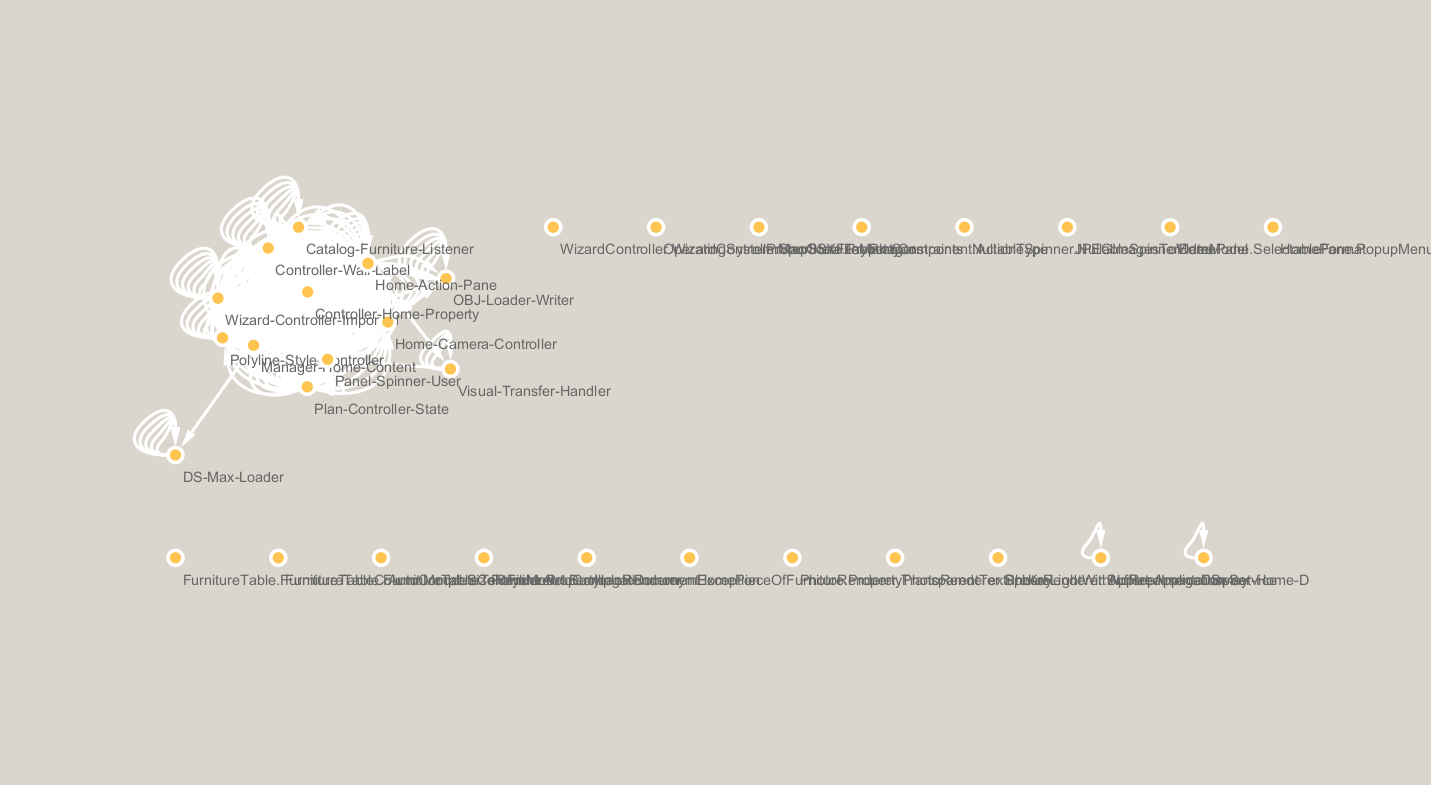

In [21]:
p4c.set_visual_style('Curved')
p4c.notebook_export_show_image()